In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [66]:
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [67]:
df.sort_values('Very interested', axis=0, ascending=False, inplace=True)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [68]:
total_respondants = 2233
df['Very interested'] = round(100*df['Very interested']/2233, 2)
df['Somewhat interested'] = round(100*df['Somewhat interested']/2233, 2)
df['Not interested'] = round(100*df['Not interested']/2233, 2)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


<IPython.core.display.Javascript object>


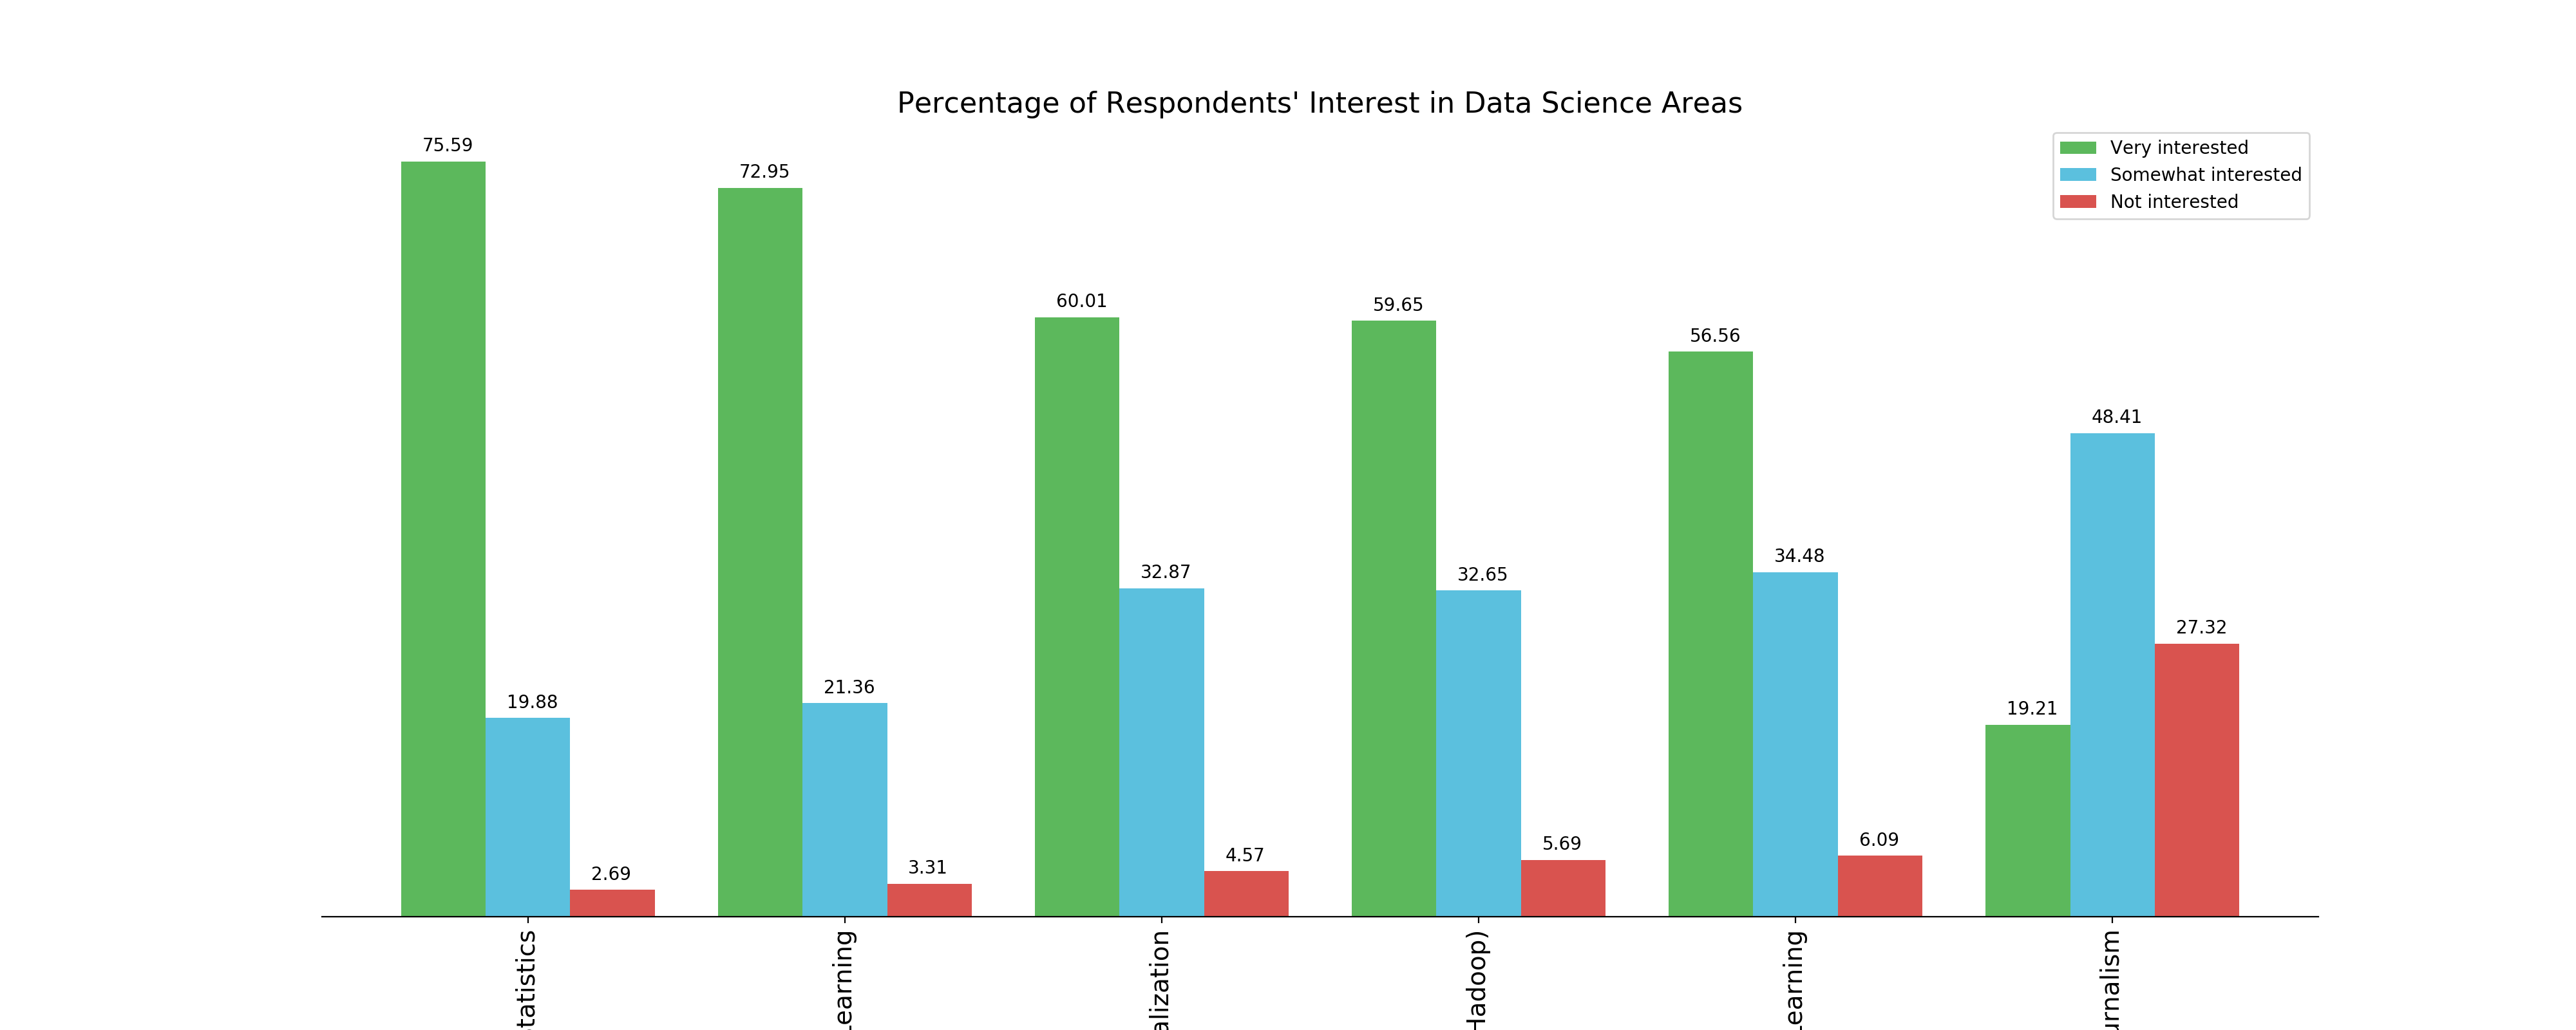

In [69]:
colors = ['#5cb85c', '#5bc0de', '#d9534f']
ax = df.plot(kind='bar', figsize=(20,8), color=colors, width=0.8, fontsize=14)
ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16)
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
    ax.annotate(s=str(p.get_height()), xy=(p.get_x() + p.get_width()/4, p.get_height()+1))

In [90]:
df1 = pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df1.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [91]:
df_sf = df1['PdDistrict'].value_counts().to_frame()
df_sf.reset_index(inplace=True)
df_sf.head()

,index,PdDistrict
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303


In [92]:
df_sf.rename(columns={'index': 'Neighborhood', 'PdDistrict':'Count'}, inplace=True)
df_sf

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [93]:
sf_geo = r'https://cocl.us/sanfran_geojson'

In [94]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [97]:
!pip install folium==0.5.0
import folium

print('Folium installed and imported!')

     |████████████████████████████████| 81kB 6.4MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
Folium installed and imported!


In [98]:
import folium

In [111]:
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sf_map

In [112]:
sf_map.choropleth(
    geo_data = sf_geo,
    data = df_sf,
    columns = ['Neighborhood', 'Count'],
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity=0.2,
    key_on = 'feature.properties.DISTRICT',
    legend_name='Crime Rate in San Francisco'
)

sf_map